In [1]:
from serpapi import GoogleSearch
from urllib.parse import *

## Scrapping API Google Mapswith serpapi 

In [41]:
params = {
  "engine": "google_maps",
  "q": "hotel", # objek yang dicari
  "ll": "@-6.186477,106.8296487,14z", #koordinat sekitar kantor
  "type": "search",
  "api_key": "TOKEN API"
}

search = GoogleSearch(params)

lIdx = 0 # indeks yang ditampilkan dari data
lSum = 6 # Batas jumlah data yang ditampilkan
local_results = []

while lIdx  <= lSum:
    results = search.get_dict()

    for Result in results["local_results"]:
        lIdx += 1

        if lIdx <= lSum:

          #seleksi data (jangan ambil data jika jumlah review < 200 )
            if Result["reviews"] < 200:
                lIdx += 1
                continue
        
          # Append data sesuai dengan batas jumlah yang sudah ditentukan
            local_results.append({'Nama': Result["title"],
                                  'data_id': Result["data_id"],
                                  'total_reviews': Result["reviews"]});

    #menghilangkan pagination pada web, sehingga data yang terambil bisa banyak
    if "next" in results.get("serpapi_pagination", {}):
        # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
        search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
        break

In [42]:
for LR in local_results:
    print(LR)

{'Nama': 'Park Hyatt Jakarta', 'data_id': '0x2e69f43040ae2d5d:0x869c6c7a536c5938', 'total_reviews': 1132}
{'Nama': 'Hotel Indonesia Kempinski Jakarta', 'data_id': '0x2e69f421963cd607:0x503cb9e9306e657a', 'total_reviews': 20992}
{'Nama': 'Ashley Sabang Jakarta', 'data_id': '0x2e69f5a65f034eed:0xe466fd78081103ba', 'total_reviews': 1364}
{'Nama': 'The Hermitage, a Tribute Portfolio Hotel, Jakarta', 'data_id': '0x2e69f415a4737463:0x94b231a525ce418a', 'total_reviews': 4300}
{'Nama': 'Lumire Hotel & Convention Center', 'data_id': '0x2e69f43551ca9263:0x4949ba549b582667', 'total_reviews': 6732}
{'Nama': 'Sriwijaya Hotel', 'data_id': '0x2e69f5cfd485895d:0xd06ded5e63e5367d', 'total_reviews': 1894}


In [43]:
data = {'Hotel_name':[],
        'name':[],
        'rating':[],
        'review':[]}

## Get Google Maps Place Reviews

In [44]:
for LR in local_results:
  
    params = {
        "engine": "google_maps_reviews",
        "data_id": "",
        "api_key": "08851987a422f702d52c8ac291e6a65769587f7b7fff05544fa7344c8d289dfe"
        }
  
    params["data_id"] = LR['data_id']

    search = GoogleSearch(params)
    
    idx_awal = 0 # Angka indeks dari data
    idx_target = 50 # Batas jumlah data yang ditampilkan

    while idx_awal <= idx_target:
        results = search.get_dict()
        
        for result in results['reviews']:
            idx_awal += 1
        
            if idx_awal <= idx_target:
                data['Hotel_name'].append(LR['Nama']);
                data['name'].append(result["user"]["name"]);
                data['rating'].append(result["rating"]);
                data['review'].append(result["snippet"]);
            
        #menghilangkan pagination pada web, sehingga data yang terambil bisa banyak
        if "next" in results.get("serpapi_pagination", {}):
            # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
            search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))
        else:
            break
    
review_original = data['review'] 

In [45]:
results['reviews'][0]

{'link': 'https://www.oyorooms.com/h/51568/?&checkin=23/07/2023&checkout=24/07/2023&guests=1&utm_source=GMB&utm_medium=reviews&utm_campaign=&utm_content=US_google_desktop&locale=en',
 'user': {'name': 'Issey Matsui',
  'thumbnail': 'https://lh3.googleusercontent.com/local-reviews/ALLSkjde9Hy0_C2QBV5WnRp6TxqaYNKo_PbrjCtvk9fmthIkbaoisVJSALBs9X0yfp99=s40-c-br100'},
 'rating_original': '5/5',
 'rating': 5.0,
 'date': '3 years ago on',
 'source': 'OYO',
 'snippet': 'Visited in August 2019',
 'visited': 'Visited in August 2019'}

In [7]:
print(len(data['Hotel_name']), len(data['name']), len(data['rating']), len(data['review']))

300 300 300 300


## Import the dictionary data to dataframe

In [48]:
import pandas as pd
df = pd.DataFrame({'hotel_name': data['Hotel_name'],
                   'name': data['name'],
                   'rating': data['rating'],
                   'review': data['review']})
df.head(5)

,hotel_name,name,rating,review
0,Park Hyatt Jakarta,Amri Syukur,5.0,Park Hyatt Jakarta is The hotel's luxurious am...
1,Park Hyatt Jakarta,Roosh Id,5.0,A luxury hotel located in a strategic location...
2,Park Hyatt Jakarta,AQIL MUQAFFI ROSYAD AL MAHMUDY,5.0,"First of all, Park Hyatt Jakarta has an exteri..."
3,Park Hyatt Jakarta,Terence Fung,5.0,Beautiful hotel with luxurious rooms. The room...
4,Park Hyatt Jakarta,Bonaventura Brilliandru,5.0,Beautiful hotel with luxurious rooms. The room...


In [122]:
df.rating.unique()

array([5. , 4. , 1. , 3. , 2. , 4.5, 4.8, 3.5])

In [49]:
import string
import re

## Transformed text to lowercase and removing punctuation

In [84]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))

In [85]:
#define label 0 and 1
def label(df):
    if (df['rating'] <= 3.0):
        return 0
    else:
        return 1

In [86]:
df['label'] = df.apply(label, axis = 1)

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

## Tokenized review statement

In [88]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))

In [13]:
df.head()

,hotel_name,name,rating,review,cleaned_text,label,Review_len,punct,tokens
0,Park Hyatt Jakarta,Amri Syukur,5.0,Park Hyatt Jakarta is The hotel's luxurious am...,park hyatt jakarta is the hotel s luxurious am...,1.0,599,2.2,"[park, hyatt, jakarta, is, the, hotel, s, luxu..."
1,Park Hyatt Jakarta,Roosh Id,5.0,A luxury hotel located in a strategic location...,a luxury hotel located in a strategic location...,1.0,192,5.2,"[a, luxury, hotel, located, in, a, strategic, ..."
2,Park Hyatt Jakarta,AQIL MUQAFFI ROSYAD AL MAHMUDY,5.0,"First of all, Park Hyatt Jakarta has an exteri...",first of all park hyatt jakarta has an exteri...,1.0,546,3.8,"[first, of, all, park, hyatt, jakarta, has, an..."
3,Park Hyatt Jakarta,Terence Fung,5.0,Beautiful hotel with luxurious rooms. The room...,beautiful hotel with luxurious rooms the room...,1.0,308,4.2,"[beautiful, hotel, with, luxurious, rooms, the..."
4,Park Hyatt Jakarta,Bonaventura Brilliandru,5.0,Beautiful hotel with luxurious rooms. The room...,beautiful hotel with luxurious rooms the room...,1.0,192,4.2,"[beautiful, hotel, with, luxurious, rooms, the..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

## Lemmatized the tokens word

In [89]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

In [90]:
lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,hotel_name,name,rating,review,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,Park Hyatt Jakarta,Amri Syukur,5.0,Park Hyatt Jakarta is The hotel's luxurious am...,park hyatt jakarta is the hotel s luxurious am...,1,599,2.2,"[park, hyatt, jakarta, is, the, hotel, s, luxu...",park hyatt jakarta hotel luxurious ambiance at...
1,Park Hyatt Jakarta,Roosh Id,5.0,A luxury hotel located in a strategic location...,a luxury hotel located in a strategic location...,1,192,5.2,"[a, luxury, hotel, located, in, a, strategic, ...",luxury hotel located strategic location staff ...
2,Park Hyatt Jakarta,AQIL MUQAFFI ROSYAD AL MAHMUDY,5.0,"First of all, Park Hyatt Jakarta has an exteri...",first of all park hyatt jakarta has an exteri...,1,546,3.8,"[first, of, all, park, hyatt, jakarta, has, an...",first park hyatt jakarta exterior attracts vis...
3,Park Hyatt Jakarta,Terence Fung,5.0,Beautiful hotel with luxurious rooms. The room...,beautiful hotel with luxurious rooms the room...,1,308,4.2,"[beautiful, hotel, with, luxurious, rooms, the...",beautiful hotel luxurious room room well appoi...
4,Park Hyatt Jakarta,Bonaventura Brilliandru,5.0,Beautiful hotel with luxurious rooms. The room...,beautiful hotel with luxurious rooms the room...,1,192,4.2,"[beautiful, hotel, with, luxurious, rooms, the...",beautiful hotel luxurious room room well appoi...


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

## Simple hotel rating review

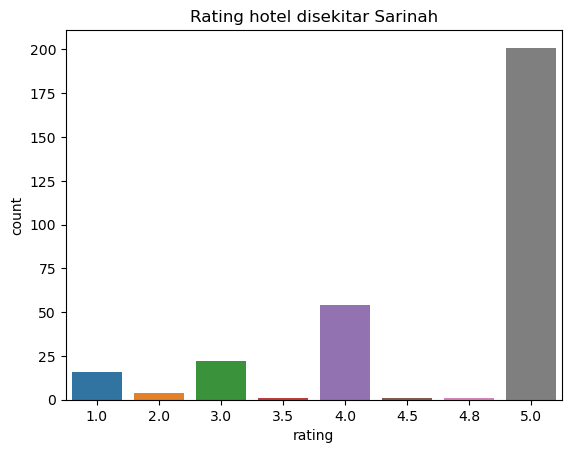

In [91]:
plot = sns.countplot(x='rating', data=df)
plt.title('Rating hotel disekitar Sarinah')
plt.show()

In [92]:
df_negative = df[ (df['rating']<=3.0)] #| (df['rating']==2.0)| (df['rating']==3.0)]
df_positive = df[ (df['rating']>3.0)] #| (df['rating']==5.0)| (df['rating']==9.0)]
                 
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

In [20]:
from wordcloud import WordCloud

### Wordcloud Positive reviews

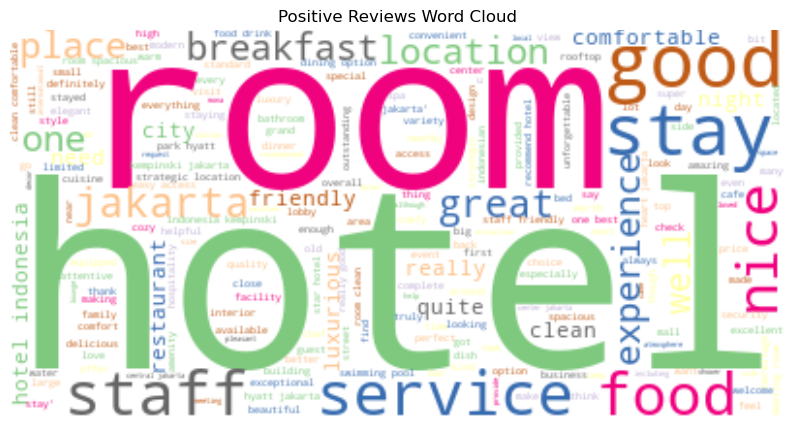

In [62]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Accent").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

### Wordcloud negative reviews

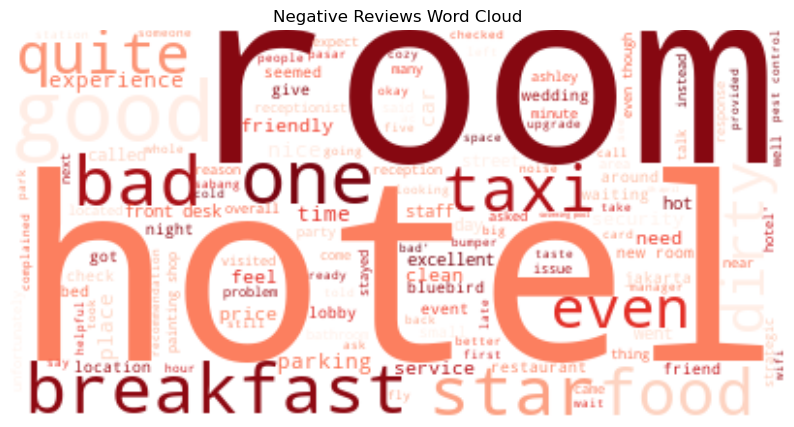

In [63]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

## Modeling and predict  with transformers and NLTK

In [64]:
from transformers import pipeline
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
classification = pipeline('sentiment-analysis')
type(classification)

In [94]:
texts = df['lemmatized_review'].to_list()

## Transformers Predicts

In [95]:
predictions = classification(texts)

In [96]:
predictions[:10]

[{'label': 'POSITIVE', 'score': 0.99930739402771},
 {'label': 'POSITIVE', 'score': 0.9996994733810425},
 {'label': 'POSITIVE', 'score': 0.999640703201294},
 {'label': 'POSITIVE', 'score': 0.9972962737083435},
 {'label': 'POSITIVE', 'score': 0.9997991919517517},
 {'label': 'POSITIVE', 'score': 0.9921918511390686},
 {'label': 'POSITIVE', 'score': 0.9998438358306885},
 {'label': 'POSITIVE', 'score': 0.9998007416725159},
 {'label': 'POSITIVE', 'score': 0.9940974712371826},
 {'label': 'POSITIVE', 'score': 0.9997715353965759}]

In [128]:
dfScrap = pd.DataFrame(predictions)

label
NEGATIVE     58
POSITIVE    242
dtype: int64


<AxesSubplot:>

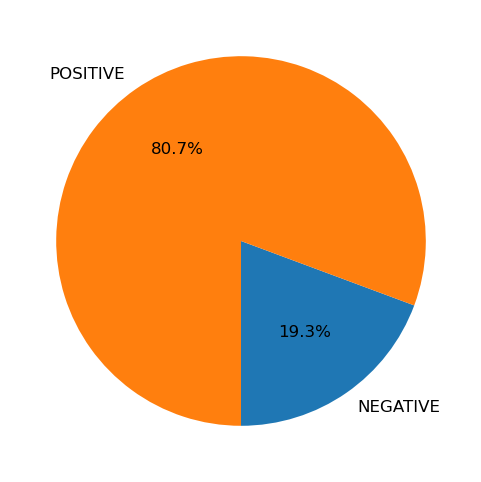

In [130]:
sentiment_counts = dfScrap.groupby(['label']).size()
print(sentiment_counts)

# Visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [69]:
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions ]

In [70]:
probs[:10]

[0.99930739402771,
 0.9996994733810425,
 0.999640703201294,
 0.9972962737083435,
 0.9997991919517517,
 0.9921918511390686,
 0.9998438358306885,
 0.9998007416725159,
 0.9940974712371826,
 0.9997715353965759]

In [97]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

In [98]:
preds = np.array(preds)

In [100]:
print("acc:", np.mean(df['label'] == preds))

acc: 0.86


In [101]:
cm = confusion_matrix(df['label'], preds)

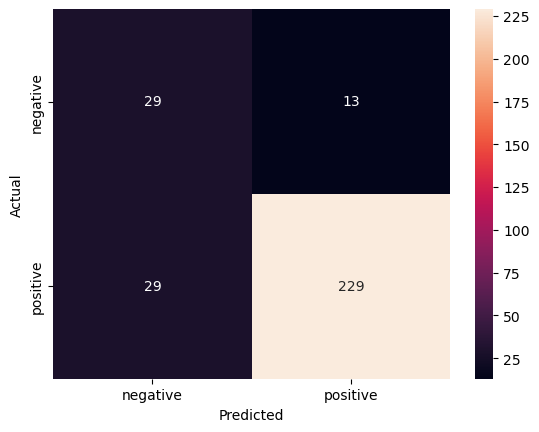

In [102]:
# create function for plotting confusion matrix
def plot_cm(cm):
    classes = ['negative','positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sns.heatmap(df_cm, annot = True, fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plot_cm(cm)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

## NLTK Predicts

In [104]:
sia = SentimentIntensityAnalyzer()

In [114]:
predict = []

# Perform sentiment analysis for each sentence
for sentence in texts:
    # Analyze sentiment
    sentiment = sia.polarity_scores(sentence)
    
    # Interpret the sentiment scores
    if sentiment['compound'] >= 0.05:
        predict.append(1)
    else:
        predict.append(0)


In [116]:
predicts = np.array(predict)

In [131]:
dfScrap1 = pd.DataFrame(predictions)

label
NEGATIVE     58
POSITIVE    242
dtype: int64


<AxesSubplot:>

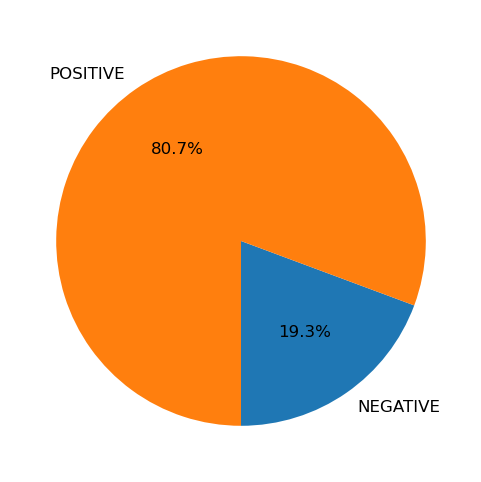

In [132]:
sentiment_counts1 = dfScrap1.groupby(['label']).size()
print(sentiment_counts)

# Visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts1.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [118]:
print("acc:", np.mean(df['label'] == predicts))

acc: 0.8633333333333333


In [119]:
cm2 = confusion_matrix(df['label'], predicts)

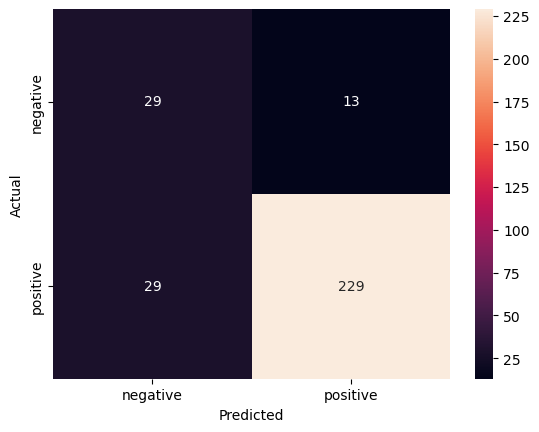

In [120]:
def plot_cm(cm2):
    classes = ['negative','positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sns.heatmap(df_cm, annot = True, fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plot_cm(cm2)